In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules") 
from utils import plot_ellipse, moca, dopioe, espra, smooth, tangential_velocity, unit_det, Rc_finder


In [2]:
x, y = np.linspace(-100, 100, 100), np.linspace(-100, 100, 100)
X, Y = np.meshgrid(x, y, indexing='ij')

xc, yc = 0, 0
Q11, Q12, Q22 = 1, 0.25, 1
psi0 = -100
Rc = 35
A = - psi0 / Rc**2

# rescale Q to have unit determinant
Q, _ = unit_det(Q=np.array([[Q11, Q12], [Q12, Q22]]))
q11, q12, q22 = Q[0,0], Q[0,1], Q[1,1]

df = pd.DataFrame({'xc': [xc], 'yc': [yc], 'q11': [q11], 'q12': [q12], 'q22': [q22],
                       'Rc': [Rc], 'psi0': [psi0], 'A': [A]})

dx, dy = X - xc, Y - yc
rho2 = q11*dx**2 + 2*q12*dx*dy + q22*dy**2
Qr = np.sqrt((q11*dx + q12*dy)**2 + (q12*dx + q22*dy)**2) 
psi = psi0 * np.exp( - rho2 / Rc**2 )
u =   psi0 * np.exp( - rho2 / Rc**2 ) * ( 2*q12*dx + 2*q22*dy ) / Rc**2
v = - psi0 * np.exp( - rho2 / Rc**2 ) * ( 2*q11*dx + 2*q12*dy ) / Rc**2

vt = tangential_velocity(X, Y, u, v, xc, yc, Q)


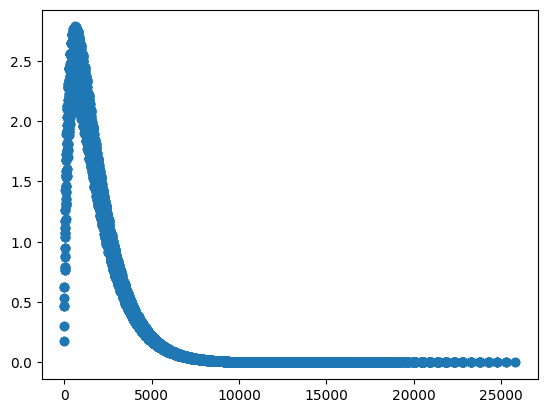

In [3]:
plt.scatter(rho2, vt)


(np.float64(-100.0), np.float64(100.0), np.float64(-100.0), np.float64(100.0))

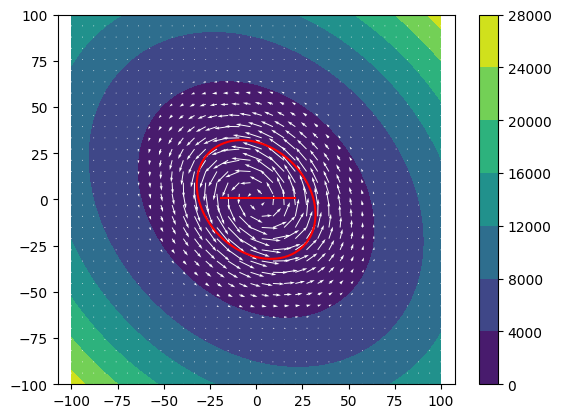

In [4]:
rho_mask = 1000

plt.contourf(X, Y, rho2)
plt.colorbar()
spac = 3
plt.quiver(X[::spac, ::spac], Y[::spac, ::spac],
              u[::spac, ::spac], v[::spac, ::spac], color='white', scale=50)
plt.contour(X, Y, rho2, levels=[rho_mask], colors='r')

r = 10
nic, njc = len(x)//2, len(y)//2
x1 = x[nic-r:nic+r+1]
y1 = np.array([y[njc]] * len(x1))

u1 = u[nic-r:nic+r+1, njc]
v1 = v[nic-r:nic+r+1, njc]

plt.plot(x1, y1, color='r')

plt.axis('equal')


In [5]:
# mask = (rho2 >= rho_mask) & (rho2 <= 2000)
# xi, yi, ui, vi = X[mask], Y[mask], u[mask], v[mask]

# vt = np.abs(tangential_velocity(xi, yi, ui, vi, xc, yc, Q))
# dx, dy = xi - xc, yi - yc
# rho2 = q11*dx**2 + 2*q12*dx*dy + q22*dy**2
# Qr = np.sqrt((q11*dx + q12*dy)**2 + (q12*dx + q22*dy)**2)
# c = 2*np.abs(A)

# y = vt/(c*Qr + 1e-300)
# m = np.isfinite(y) & np.isfinite(rho2) & (y>0)
# x = rho2[m]
# z = np.log(y[m])

# s = (x @ z) / (x @ x)
# Rc_opt = np.sqrt(-1/s) if s < 0 else np.nan

# vt_theo = c*np.exp(-rho2/(Rc_opt**2))*Qr
# plt.scatter(rho2, vt, s=5)
# plt.scatter(0, 0, color='g', marker='o', s=5)
# plt.scatter(rho2, vt_theo, color='r', s=5)
# plt.title(f'$Rc={Rc_opt}$')


In [6]:
# mask = (rho2 >= rho_mask) & (rho2 <= 2000)
# xi, yi, ui, vi = X[mask], Y[mask], u[mask], v[mask]

xi, yi, ui, vi = x1, y1, u1, v1


Text(0.5, 1.0, '$R_c = 60.22$')

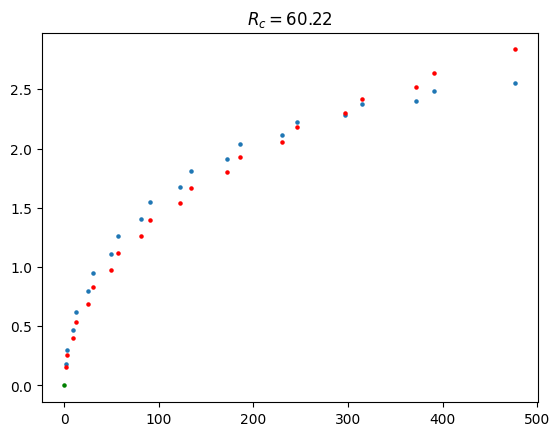

In [7]:
def find_Rc(xi, yi, ui, vi, xc, yc, Q, A):
    q11, q12, q22 = Q[0,0], Q[0,1], Q[1,1]
    dx, dy = xi - xc, yi - yc
    vt = np.abs(tangential_velocity(xi, yi, ui, vi, xc, yc, Q))
    rho2 = q11*dx**2 + 2*q12*dx*dy + q22*dy**2
    Qr = np.sqrt((q11*dx + q12*dy)**2 + (q12*dx + q22*dy)**2)
    c = 2*np.abs(A)
    y = vt/(c*Qr + 1e-300)
    m = np.isfinite(y) & np.isfinite(rho2) & (y > 0)
    x, z = rho2[m], np.log(y[m])
    s = (x @ z) / (x @ x)
    return np.sqrt(-1/s) if s < 0 else np.nan

A = 0.07

Rc_opt = find_Rc(xi, yi, ui, vi, xc, yc, Q, A)

dx, dy = xi - xc, yi - yc
# q11, q12, q22 = Q[0,0], Q[0,1], Q[1,1]
rho2i = q11*dx**2 + 2*q12*dx*dy + q22*dy**2
Qri = np.sqrt((q11*dx + q12*dy)**2 + (q12*dx + q22*dy)**2)
c = 2*np.abs(A)
vt = np.abs(tangential_velocity(xi, yi, ui, vi, xc, yc, Q))
vt_theo = c*np.exp(-rho2i/(Rc_opt**2))*Qri

plt.scatter(0, 0, color='g', marker='o', s=5)
plt.scatter(rho2i, vt, s=5)
plt.scatter(rho2i, vt_theo, color='r', s=5)

plt.title(f'$R_c = {Rc_opt:.2f}$')


Text(0.5, 1.0, '$R_c = 60.22$')

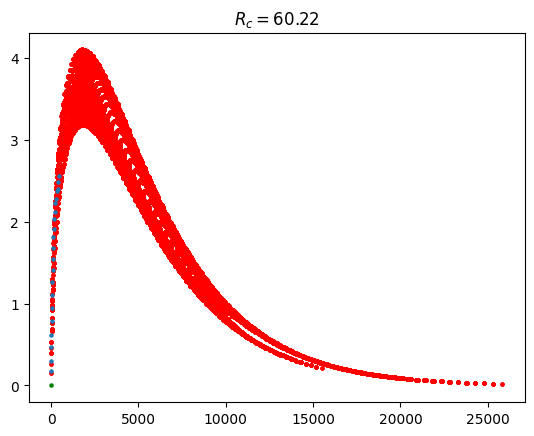

In [8]:
c = 2*np.abs(A)
vt = np.abs(tangential_velocity(xi, yi, ui, vi, xc, yc, Q))
vt_theo = c*np.exp(-rho2/(Rc_opt**2))*Qr

plt.scatter(0, 0, color='g', marker='o', s=5)

plt.scatter(rho2, vt_theo, color='r', s=5)
plt.scatter(rho2i, vt, s=5)

plt.title(f'$R_c = {Rc_opt:.2f}$')


In [9]:
A


0.07